In [39]:
#%matplotlib inline

# Section I. load iris dataset

- Load the copy of the Iris dataset shipped with scikit-learn.

In [40]:
import scipy
import numpy as np
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()

# print the label species(setosa, versicolor,virginica)
print(iris.target_names)

# print the names of the four features
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [41]:
# Print the first 6 iris data (top 6 records) by changing the index
print(iris.data[90:96])

# Print the labels of such iris data (0:setosa, 1:versicolor, 2:virginica)
print(iris.target[90:96])

# Examples in each class 
import numpy as np
np.bincount(iris.target)

[[5.5 2.6 4.4 1.2]
 [6.1 3.  4.6 1.4]
 [5.8 2.6 4.  1.2]
 [5.  2.3 3.3 1. ]
 [5.6 2.7 4.2 1.3]
 [5.7 3.  4.2 1.2]]
[1 1 1 1 1 1]


array([50, 50, 50])

In [42]:
# Create a DataFrame of given iris dataset.
import pandas as pd
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})

data.head(4)

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0


In [43]:
data.var()

sepal length    0.685694
sepal width     0.189979
petal length    3.116278
petal width     0.581006
species         0.671141
dtype: float64

# Section II. CLASSIFICATION WITH RANDOM FOREST

- Question 1: Study the impact of the number of trees and the size of the training set. Interpret the results in terms of accuracy and confusion matrix

In [44]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # 4 attributes as feature inputs
y=data['species']  # Labels

# Split dataset into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0) 

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create the Classifier
clf=RandomForestClassifier(n_estimators=100) #By default: n_estimators=100, min_samples_split=2

#Train the model using the training sets 
clf.fit(X_train,y_train)

#Classification of test data
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score

# Predict Accuracy Score, how often is the classifier correct?
y_pred = clf.predict(X_test)
print("Train data_Accuracy:",accuracy_score(y_true = y_train, y_pred=clf.predict(X_train))*100, "%")
print("Test data_Accuracy:",accuracy_score(y_true = y_test, y_pred=y_pred)*100, "%")

Train data_Accuracy: 100.0 %
Test data_Accuracy: 97.77777777777777 %


- Question 2: Try to classify these new 3 data 

In [45]:
#species_idx = clf.predict([[5, 3, 1.4, 0.2]])[0]
#species_idx = clf.predict([[3, 5, 4, 2]])[0]
species_idx = clf.predict([[6, 2, 0.4, 1.2]])[0]
iris.target_names[species_idx]

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


'setosa'

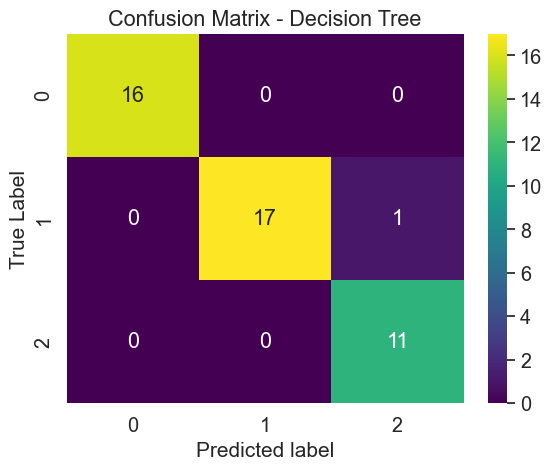

<Figure size 1000x700 with 0 Axes>

In [46]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

# Get the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)#turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="viridis")#set axis titles
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_ylabel("True Label", fontsize=15)

plt.show()

# Section III. IDENTIFICATION OF THE IMPORTANT ATTRIBUTES
- Question 3: Use Random Forest to select the most important features
- Question 4: Interpret the results comparatively to thoses obtained in the previous Lab Session (Decision Trees)

In [47]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal length (cm)    0.485906
petal width (cm)     0.379235
sepal length (cm)    0.107321
sepal width (cm)     0.027538
dtype: float64

/var/folders/6y/9sn_0x3d041dsl6rwm8hpy300000gn/T/ipykernel_30169/1786060831.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_imp, y=feature_imp.index, palette="viridis")


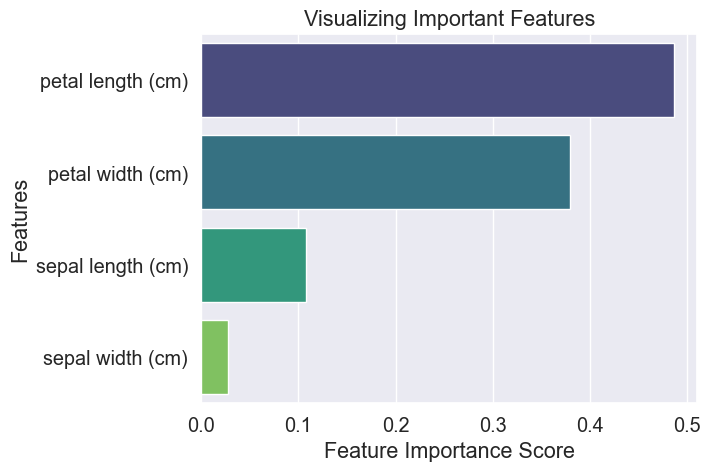

In [48]:
%matplotlib inline

# Creating bar plot of feature importance score
sns.barplot(x=feature_imp, y=feature_imp.index, palette="viridis")

# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
#plt.legend()
plt.show()

# Section IV. DESIGN OF DIFFERENT RF MODELS FOR CLASSIFICATION 

- Question 5: Analyze the performance (on the training and test sets) using the 4 attributes separately, then different combinations of two attributes, and finally using the most pertinent features. Compare the results with the case considering the four attributes simultaneously (in Section II).


In [87]:
# Import train_test_split function
#from sklearn.cross_validation import train_test_split

# Split dataset into features and labels
####X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Original Features
X=data[['petal width']]  # Choose the attributes !!!!!!

y=data['species']                                       
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0) # 70% training and 30% test


# Create the Classifier
clf=RandomForestClassifier(n_estimators=100)

# Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# Prediction on test set
y_pred=clf.predict(X_test)

# Predict Accuracy Score, how often is the classifier correct?
y_pred = clf.predict(X_test)
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred=clf.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=y_pred))

Train data accuracy: 0.9523809523809523
Test data accuracy: 0.9777777777777777


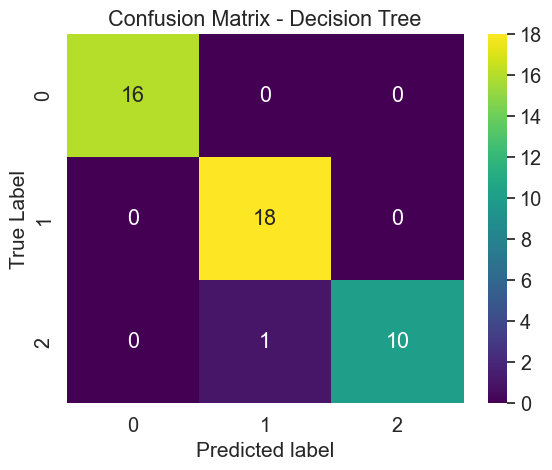

<Figure size 1000x700 with 0 Axes>

In [88]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

# Get the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test,  
                                            y_pred)#turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="viridis")#set axis titles
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_ylabel("True Label", fontsize=15)

plt.show()